In [2]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
import matplotlib.pyplot as plt

In [17]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china,flower],dtype=np.float32)
batch_size,height,width,channels = dataset.shape
type(dataset)

numpy.ndarray

(2, 427, 640, 3)


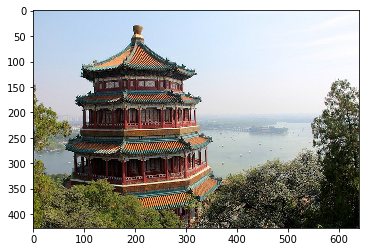

In [4]:
print(dataset.shape)
plt.imshow(china);plt.show()

In [6]:
filters = np.zeros(shape=(7,7,channels,2),dtype = np.float32)
filters[:,3,:,0]=1
filters[3,:,:,1]=1
print(filters.shape)

(7, 7, 3, 2)


In [7]:
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
convolution = tf.nn.conv2d(X,filters,strides=[1,2,2,1],padding="SAME")

In [8]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X:dataset})

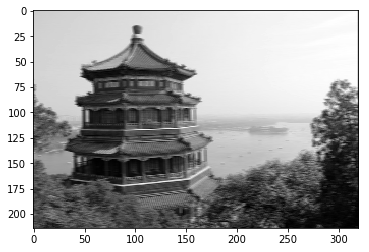

In [14]:
plt.imshow(output[0,:,:,1],cmap="gray"); plt.show()

In [32]:
X = tf.placeholder(tf.float32,shape=(None,height,width,channels))
max_pool = tf.nn.max_pool(X,ksize=[1,2,2,1], strides=[1,2,2,1],padding="VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X:dataset})

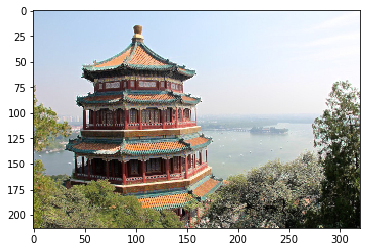

In [33]:
plt.imshow(output[0].astype(np.uint8))
plt.show()